# ML: Assignment 3

## Libraries

### Installs & External

In [1]:
# !pip install tensorflow-macos nltk

### Imports

In [2]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [3]:
from src.data_loading import DataLoader
from src.data_processing import Process

from src.next_word_model import NextWordModel

from src.prediction_evaluation import Evaluator

/Users/tilmankerl/Documents/UNI/01_WS22/Machine Learning/exercises/03/env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tilmankerl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Pipeline

### Data Loading & Processing

In [4]:
dl = DataLoader()
process = Process(
    dl,
    sample_factor = 0.95    
)

In [5]:
X_train, X_test, y_train, y_test = process.process(force = True)

/Users/tilmankerl/Documents/UNI/01_WS22/Machine Learning/exercises/03/src/data_processing.py:36: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["hasLink"] = df.text.str.contains(url_regex)


### Model Init & Training

In [6]:
model = NextWordModel(
    processor=process,
    load_existing=True
)

Loading existing model failed:
No file or directory found at /Users/tilmankerl/Documents/UNI/01_WS22/Machine Learning/exercises/03/src/_objects/lstm.nextword.model
(15176,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             151760    
                                                                 
 lstm (LSTM)                 (None, 1, 100)            44400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 15176)             1532776   
                                                                 
Total params: 1

In [7]:
model.train(X_train, y_train, epochs = 100)

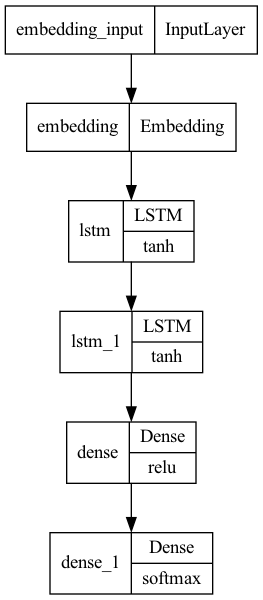

In [8]:
import tensorflow as tf

tf.keras.utils.plot_model(
    model.model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)


### Model Evaluation

In [9]:
pred = model.predict("america")
print(pred)

2023-02-25 00:36:58.899119: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


touring


In [10]:
ev = Evaluator(model)

In [11]:
len(X_test)

107383

In [12]:
X_test = X_test[0:2500]
y_test = y_test[0:2500]

In [13]:
ev.evaluate(X_test, y_test, eval_type="id")

KeyboardInterrupt: 

In [ ]:
ev.evaluate(X_test, y_test, eval_type="lemma")

In [ ]:
acc, scores = ev.evaluate(X_test, y_test, eval_type="embedding")

In [ ]:
num_bins = 100
plt.hist(
    list(scores), 
    num_bins, 
    density = 1, 
    color ='green',
    alpha = 0.7
)

In [ ]:
acc_list = []

for threshold in range(2, 10, 1):
    t = threshold/10
    acc, scores = ev.evaluate(X_test, y_test, eval_type="embedding", threshold=t)
    acc_list.append({
        "accuracy": acc,
        "threshold": t
    })

In [ ]:
acc_emb_df = pd.DataFrame(acc_list)
acc_emb_df.plot(
    x = "threshold",
    y = "accuracy"
)